# Project: Wrangling and Analyze Data

This project uses scraped json data of Twitter user ratings of dogs, and analyzes them.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [95]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save tsv to file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library or provided json library to query additional data via the Twitter API (tweet_json.txt)

In [96]:
# Using provided json file
import json

# List creation
list_API = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    line_data = json.loads(line)
    list_API.append({'tweet_id': line_data['id_str'],
                                    'retweet_count': line_data['retweet_count'],
                                    'favorite_count': line_data['favorite_count']})
    
df_API = pd.DataFrame.from_dict(list_API)

## Assessing Data

### Assess dataframe, 'df'

In [97]:
# Visual assessment of 'df' head
# Observations - dog stage is split across four columns, score split across two columns, many NaN values
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [98]:
# Visual assessment of 'df' head
# Observations - nothing specific
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN


In [99]:
# Programmatic assessment of 'df' - using info function to asses non-null count and data types
# Observations - 181 retweets present, 2356 rows in total, some missing information in expanded_urls etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [100]:
# Programmatic assessment of 'df' - using descibe function to assess max min ranges and count
# Observations - rating_denominator is not constant
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [101]:
# Programmatic assessment of 'df' - looking for duplicates
# Observations - no duplicate rows
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [102]:
# Look for null values
# Observation - reply columns, retween columns, and expanded urls contains null values
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [103]:
# Looking for tweet_id duplicates
# Observations - all unique
df.tweet_id.duplicated().sum()

0

In [104]:
# Looking for irregularities in dog name
# Observations - lowercase appear to be all non dog names
mask = df.name.str.contains('^[a-z]', na = False, regex = True)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2356, dtype: bool

In [105]:
df[mask].name.value_counts().sort_index()

name
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: count, dtype: int64

In [106]:
# Inspect potentially erroneous dog names
# Observations - many of these aren't actually dogs
df.query('name =="a" or name == "the" or name == "an" or name == "my"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,NaN,NaN
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,NaN,NaN,NaN,NaN
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,NaN,NaN,NaN,NaN
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,NaN,NaN,NaN,NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN


In [107]:
# Check for text duplicates to see if dog is duplicated or just dog name
df.text.duplicated().sum()

0

In [108]:
# Check to see most recent timestamp
# Observations - August 8th 2017 latest time stamp
df.timestamp.sort_values(ascending=False).head(5)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [109]:
# Examine dogs that are 'floofer'
# Observations - index 200 is also labelled 'doggo'
df[df.floofer != 'None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [110]:
# Inspect dogs that don't have a stage
# Observations - some exist without a stage
df.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [111]:
# Examine denominators
# Observations - mostly '10' but not all the same
df['rating_denominator'].value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

### Assess dataframe, 'df_predictions'

In [112]:
# Visual assessment
# Observations - useful information can be used to identify as dog and dog breed, assessed three times with varying confidence
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [113]:
# Visual assessment
# Observations - some images are recognized not as dogs e.g. paper_towel, orange
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [114]:
# Programmatic assessment
# Observations - 2075 entries, all non-null, tweet_id is also an integer as with first df
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [115]:
# Programmatic assessment
# Observations - nothing specific
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [116]:
# Assses dog breeds in p1
# Observations - many non-dog values e.g. sea_urchin
df_predictions.p1.value_counts()

p1
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: count, Length: 378, dtype: int64

In [117]:
# # Assses dog breeds in p2
# Observations - many non-dog values e.g. laptop
df_predictions.p2.value_counts()

p2
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: count, Length: 405, dtype: int64

In [118]:
# Assses dog breeds in p3
# Observations - many non-dog values e.g. beach_wagon
df_predictions.p3.value_counts()

p3
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: count, Length: 408, dtype: int64

In [119]:
# Assess number non-dog in p1
df_predictions.p1_dog.value_counts()

p1_dog
True     1532
False     543
Name: count, dtype: int64

In [120]:
# Assess number non-dog in p2
df_predictions.p2_dog.value_counts()

p2_dog
True     1553
False     522
Name: count, dtype: int64

In [121]:
# Assess number non-dog in p3
df_predictions.p3_dog.value_counts()

p3_dog
True     1499
False     576
Name: count, dtype: int64

### Assess dataframe, 'df_API'

In [122]:
# Intiail visual assessment
# Observations - useful infomration such as tweet_id, favorite_count and retweet_count to aid in analysis
df_API.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [123]:
# Programmatic assessment
# Observations - 2354 entries, 0 null values, tweed_id is object not integer (this will need to be changed to merge with other dfs)
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [124]:
# Programmatic assessment
# Observations - favorite count ranges from zero to 132810 and retweet_count from 0 to 79515
df_API.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality Issues

Note: Three new dataframes with the suffix '_clean' are created to preserve raw data.

1. Regarding 'df_clean', remove 181 retweets.

2. Regarding 'df_clean', remove rows that are using typo dog names. For the most part these appear to be spam (lobsters, humans, etc.), and names with lowercase first characters. This includes the following names; 'a', 'the', 'an', 'my'.

3. Regarding 'df_clean', recreate the user rating from 'text' column and convert to float.

4. Regarding 'df_clean', concatenate rating_numerator2 and rating_denominator2 into a single column 'score_ratio' and calculate a new value converting the ratio into a percentage for ease of analysis (readability and ranking), 'score_percentage'.

5. Regarding 'df_predictions_clean', keep rows where each AI recognizes the image as a dog.

6. Regarding 'df_API_clean', convert data type of column 'tweet_id' in dataframe 'df_API_clean' to int64.

### Tidiness issues

1. Regarding 'df_clean', drop columns that aren't of interest in later analysis.

2. Regarding 'df_clean', create a new column to account for dogs that aren't defined as either doggo, floofer, pupper and pupper. Once complete, melt the *doggo*, *floofer*, *pupper*, *puppo* and new 'Unknown' columns to a *dog_stage* column. Remove 'None' entries. Remove those that had multiple dog_stage definitions (remove duplicates).

3. Merge 'df_predictions_clean' with 'df_clean', then merge 'df_API_clean' with 'df_clean'.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [125]:
# Make copies of original pieces of data
df_clean = df.copy()
df_predictions_clean = df_predictions.copy()
df_API_clean = df_API.copy()

### Quality Issue #1:

#### Define
Regarding 'df_clean', remove 181 retweets.

#### Code

In [126]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()==True]

#### Test

In [127]:
df_clean[df_clean.retweeted_status_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #2:

#### Define
Regarding 'df_clean', remove rows that are using typo dog names. For the most part these appear to be spam (lobsters, humans, etc.), and names with lowercase first characters. This includes the following names; 'a', 'the', 'an', 'my'.

#### Code

In [128]:
# remove the dog names lowercase values from the dataset, you can index of rows where the dog names were lower case
mask = df_clean.name.str.islower().fillna(False)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2175, dtype: bool

#### Test

In [129]:
lower_dog_name_index = df_clean[mask].index

In [130]:
# Then drop the rows using this index
df_clean.drop(lower_dog_name_index, inplace=True)

In [133]:
mask = df_clean.name.str.contains('^[a-z]', na= False, regex = True)
df_clean[mask].name.value_counts().sort_index()

Series([], Name: count, dtype: int64)

In [134]:
df_clean.shape

(2071, 17)

### Quality Issue #3:

#### Define
Regarding 'df_clean', recreate the user rating from 'text' column and convert to float.

#### Code

In [135]:
df_clean[['rating_numerator2', 'rating_denominator2']] = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_clean = df_clean.astype({'rating_numerator2': float,'rating_denominator2':float})

#### Test

In [136]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator2,rating_denominator2
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,13.0,10.0


In [137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2071 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2071 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2071 non-null   object 
 4   source                      2071 non-null   object 
 5   text                        2071 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2013 non-null   object 
 10  rating_numerator            2071 non-null   int64  
 11  rating_denominator          2071 non-null   int64  
 12  name                        1391 non-null   object 
 13  doggo                       84 non-nul

### Quality Issue #4:

#### Define
Regarding 'df_clean', concatenate rating_numerator2 and rating_denominator2 into a single column 'score_ratio' and calculate a new value converting the ratio into a percentage for ease of analysis (readability and ranking), 'score_percentage'.

#### Code

In [138]:
df_clean[df_clean.rating_denominator2 != 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator2,rating_denominator2
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN,960.0,0.0
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN,11.0,15.0
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN,84.0,70.0
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN,24.0,7.0
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN,165.0,150.0


In [139]:
df_clean['score_percentage'] = (df_clean.rating_numerator2 / df_clean.rating_denominator2)*100

In [140]:
df_clean['score_ratio'] = df_clean["rating_numerator2"].astype(str) + '/' + df_clean["rating_denominator2"].astype(str)

#### Test

In [141]:
# It is noted that one of the results is divided by zero and thus equates to infinity, this is ignored because it's part of the fun.
df_clean['score_ratio'].value_counts()

score_ratio
12.0/10.0      485
10.0/10.0      419
11.0/10.0      409
13.0/10.0      300
9.0/10.0       141
8.0/10.0        91
7.0/10.0        47
14.0/10.0       39
5.0/10.0        33
6.0/10.0        30
3.0/10.0        18
4.0/10.0        12
1.0/10.0         7
2.0/10.0         7
4.0/20.0         2
420.0/10.0       2
0.0/10.0         2
80.0/80.0        1
45.0/50.0        1
44.0/40.0        1
17.0/10.0        1
143.0/130.0      1
99.0/90.0        1
7.0/11.0         1
20.0/16.0        1
9.5/10.0         1
11.26/10.0       1
144.0/120.0      1
121.0/110.0      1
165.0/150.0      1
50.0/50.0        1
9.0/11.0         1
1776.0/10.0      1
13.5/10.0        1
11.27/10.0       1
9.75/10.0        1
24.0/7.0         1
84.0/70.0        1
11.0/15.0        1
960.0/0.0        1
15.0/10.0        1
182.0/10.0       1
666.0/10.0       1
88.0/80.0        1
Name: count, dtype: int64

### Quality Issue #5:

#### Define
Regarding 'df_predictions_clean', keep rows where each AI recognizes the image as a dog.

#### Code

In [142]:
df_predictions_clean = df_predictions_clean.query('p1_dog == True and p2_dog == True and p3_dog == True')

#### Test

In [143]:
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality Issue #6:

#### Define
Regarding 'df_API_clean', convert data type of column 'tweet_id' in dataframe 'df_API_clean' to int64.

#### Code

In [144]:
df_API_clean = df_API.astype({"tweet_id": int})

#### Test

In [145]:
df_API_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Tidiness Issue #1:

#### Define
Regarding 'df_clean', drop columns that aren't of interest in later analysis.

#### Code

In [146]:
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator'],axis=1,inplace=True)

#### Test

In [147]:
df_clean.head(1)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator2,rating_denominator2,score_percentage,score_ratio
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,13.0,10.0,130.0,13.0/10.0


### Tidiness Issue #2:

#### Define
Melt dog stage columns into single column and fix multiple stage tweets.

#### Code

In [148]:
# handle none
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

df_clean.dog_stage.unique()

array([nan], dtype=object)

In [149]:
# handle multiple stages
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

# handle missing values
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan

# drop old columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [150]:
df_clean.dog_stage.unique()

array([nan], dtype=object)

In [151]:
df_clean.head(1)

,tweet_id,timestamp,text,name,rating_numerator2,rating_denominator2,score_percentage,score_ratio,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0,10.0,130.0,13.0/10.0,NaN


### Tidiness Issue #3:

#### Define
Merge 'df_predictions_clean' with 'df_clean', then merge 'df_API_clean' with 'df_clean'.

#### Code

In [152]:
df_clean = pd.merge(df_clean, df_predictions_clean, on=['tweet_id'], how='inner')
df_clean = pd.merge(df_clean, df_API_clean, on=['tweet_id'], how='inner')

#### Test

In [153]:
df_clean.head(1)

,tweet_id,timestamp,text,name,rating_numerator2,rating_denominator2,score_percentage,score_ratio,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


In [154]:
df_clean.shape

(1148, 22)

In [155]:
df_clean

,tweet_id,timestamp,text,name,rating_numerator2,rating_denominator2,score_percentage,score_ratio,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0,10.0,120.0,12.0/10.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,12.0,10.0,120.0,12.0/10.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
3,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,NaN,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
4,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,Zoey,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,666082916733198337,2015-11-16 02:38:37 +0000,Here we have a well-established sunblockerspan...,NaN,6.0,10.0,60.0,6.0/10.0,NaN,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,...,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True,47,121
1144,666073100786774016,2015-11-16 01:59:36 +0000,Let's hope this flight isn't Malaysian (lol). ...,NaN,10.0,10.0,100.0,10.0/10.0,NaN,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,...,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,174,335
1145,666071193221509120,2015-11-16 01:52:02 +0000,Here we have a northern speckled Rhododendron....,NaN,9.0,10.0,90.0,9.0/10.0,NaN,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,...,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True,67,154
1146,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,NaN,5.0,10.0,50.0,5.0/10.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [156]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [157]:
# Top three tweets by 'score_percentage'
df_clean.sort_values('score_percentage', ascending = False).p1.head(3)

261           golden_retriever
209               Irish_setter
110    black-and-tan_coonhound
Name: p1, dtype: object

In [158]:
# Group by 'p1' and assess the mean 'score_percentage', sort for top three results
df_clean.groupby('p1')['score_percentage'].mean().sort_values(ascending=False).head(3)

p1
black-and-tan_coonhound    140.000000
Saluki                     125.000000
briard                     123.333333
Name: score_percentage, dtype: float64

In [159]:
# Group by 'p1' and assess the mean 'favorite_count', sort for top three results
df_clean.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(3)

p1
black-and-tan_coonhound    33911.0
Irish_water_spaniel        25225.0
Saluki                     24060.0
Name: favorite_count, dtype: float64

### Insights:
1. The top three scoring dogs (using 'p1' as the most confident AI interpretation) are 'golden_retriever', 'Irish_setter', 'black-and-tan_coonhound'.

2. The top three highest scoring dog breeds by mean (using 'p1' as the most confident AI interpretation) are 'black-and-tan_coonhound' and 'Saluki' and 'briard'.

3. The top three highest dog breeds w.r.t. 'favorite_count' by mean (using 'p1' as the most confident AI interpretation) are 'black-and-tan_coonhound', 'Irish_water_spaniel', and 'Saluki'.

### Visualization

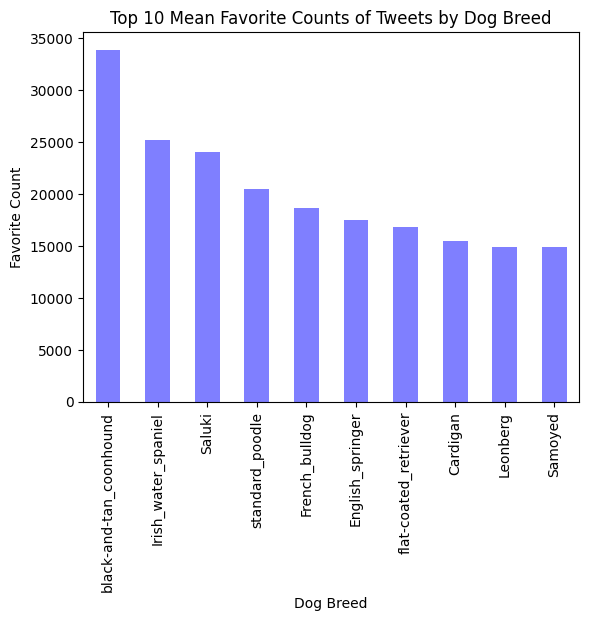

In [160]:
# As score mean can be swayed by a small number of biased tweets, I think favorite count (multi-user rated) would be a better value for visualisation of popular dog breeds
df_clean.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar',alpha=0.5, color= 'Blue');
plt.figsize=(10,8);
plt.title('Top 10 Mean Favorite Counts of Tweets by Dog Breed');
plt.xlabel('Dog Breed');
plt.ylabel('Favorite Count');